In [ ]:
(1*(2))(2*())(3*())(4*())(5*())(6*())

In [1]:
import numpy as np

In [3]:
a = np.array([1,2,3,4,5,6])

In [4]:
a.var()

2.9166666666666665

In [6]:
b = np.array([2/15,2/15,2/15,2/15,2/15,5/15])

In [10]:
c = a * b
c.sum()

4.0

In [11]:
a.mean()

3.5

In [13]:
(1400*0.03*0.97)*0.5

20.37

In [14]:
1400*0.03

42.0

In [15]:
85*0.001

0.085

In [16]:
5000*0.07

350.00000000000006

In [2]:
import pandas as pd

In [2]:
df = pd.read_csv('ab_data - ab_data.csv')

In [97]:
df = pd.read_csv('ab_data_practice.csv')

In [173]:
df = pd.read_csv('cuped_example.csv')

In [36]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
287616,944152,2017-01-21 03:33:28.813182,control,old_page,1
287617,944533,2017-01-11 16:31:55.252610,treatment,new_page,1
287618,945131,2017-01-07 11:53:08.813744,treatment,new_page,1
287619,945627,2017-01-17 15:43:17.255322,treatment,new_page,1


In [37]:
df.nunique()

user_id         287621
timestamp       287621
group                2
landing_page         2
converted            2
dtype: int64

In [38]:
df[df.duplicated(['user_id'], keep = False)].sort_values("user_id")

,user_id,timestamp,group,landing_page,converted


In [15]:
mis = df[df.duplicated(['user_id'], keep = False)]['user_id'].nunique()
mas = df['user_id'].nunique()
print(f"Poau {mis/mas}")

Poau 0.013400600170690747


In [17]:
df = df.drop_duplicates("user_id", keep=False)

In [18]:
df.nunique()

user_id         286690
timestamp       286690
group                2
landing_page         2
converted            2
dtype: int64

In [46]:
df.groupby('group')['converted'].mean()

group
control      0.123050
treatment    0.125749
Name: converted, dtype: float64

In [20]:
df['group'].value_counts()

treatment    143397
control      143293
Name: group, dtype: int64

In [27]:
from statsmodels.stats.weightstats import ztest

In [87]:
statistic, p_value = ztest(df[df["group"] == "treatment"].converted,
                                   df[df["group"] == "control"].converted)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:1546: RuntimeWarning: Mean of empty slice.
  x2_mean = x2.mean(0)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:1547: RuntimeWarning: Degrees of freedom <= 0 for slice
  x2_var = x2.var(0)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

In [33]:
statistic

2.265364406392722

In [34]:
p_value

0.02349032668040717

In [56]:
df[(df['group'] == 'control')&(df['landing_page'] == 'old_page')].groupby('group')['converted'].count()

group
control    143545
Name: converted, dtype: int64

In [98]:
df[(df['group'] == 'control')&(df['landing_page'] == 'old_page')].shape

(143545, 5)

In [99]:
df[(df['group'] == 'control')&(df['landing_page'] == 'new_page')].shape

(218, 5)

In [91]:
df = df[-(df['group'] == 'control')&-(df['landing_page'] == 'new_page')]

In [100]:
df[(df['group'] == 'treatment')&(df['landing_page'] == 'new_page')].shape

(143622, 5)

In [101]:
df[(df['group'] == 'treatment')&(df['landing_page'] == 'old_page')].shape

(236, 5)

In [94]:
df = df[-(df['group'] == 'treatment')&-(df['landing_page'] == 'old_page')]

In [103]:
df = df[((df['group'] == 'control')&(df['landing_page'] == 'old_page'))|((df['group'] == 'treatment')&(df['landing_page'] == 'new_page'))]

In [61]:
df[(df['group'] == 'treatment')&(df['landing_page'] == 'new_page')].groupby('group')['converted'].count()

group
treatment    143622
Name: converted, dtype: int64

In [104]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
287615,943176,2017-01-23 02:34:46.682339,treatment,new_page,1
287616,944152,2017-01-21 03:33:28.813182,control,old_page,1
287617,944533,2017-01-11 16:31:55.252610,treatment,new_page,1
287618,945131,2017-01-07 11:53:08.813744,treatment,new_page,1


In [105]:
df['group'].value_counts()

treatment    143622
control      143545
Name: group, dtype: int64

In [106]:
statistic, p_value = ztest(df[df["group"] == "treatment"].converted,
                                   df[df["group"] == "control"].converted)

In [107]:
statistic

2.1164957417289

In [108]:
p_value

0.03430266698861987

In [163]:
import numpy as np
import pandas as pd

example = pd.DataFrame({
    "group": ["t", "c", "t", "c", "t", "c"],
    "covariate": [1500, 1300, 1600, 1400, 1200, 1000],
    "metric": [1700, 1200, 2000, 1500, 1200, 1100]
})

thetta = np.cov(example["metric"], example["covariate"])[0][1] / np.var(example["covariate"])
example["CUPED"] = example["metric"] - (example["covariate"] - example["covariate"].mean()) * thetta

In [164]:
thetta

1.7999999999999998

In [169]:
example['a'] = (example['CUPED']-1450)**2
example['b'] = (example['metric']-1450)**2

In [170]:
h = example['a'].sum()/example['CUPED'].count()
j = example['b'].sum()/example['metric'].count()

In [171]:
h**0.5

136.01470508735443

In [172]:
j**0.5

320.1562118716424

In [151]:
example['CUPED'].count()

6

In [146]:
example['a']**2

0     2500.0
1    36100.0
2     4900.0
3     4900.0
4      100.0
5    62500.0
Name: a, dtype: float64

In [143]:
example

,group,covariate,metric,CUPED,a
0,t,1500,1700,1400.0,-50.0
1,c,1300,1200,1260.0,-190.0
2,t,1600,2000,1520.0,70.0
3,c,1400,1500,1380.0,-70.0
4,t,1200,1200,1440.0,-10.0
5,c,1000,1100,1700.0,250.0


In [127]:
example.agg(('mean',np.var))

,covariate,metric,CUPED
mean,1333.333333,1450.0,1450.0
var,46666.666667,123000.0,22200.0


In [129]:
example.describe()

,covariate,metric,CUPED
count,6.000000,6.000000,6.000000
mean,1333.333333,1450.000000,1450.000000
std,216.024690,350.713558,148.996644
min,1000.000000,1100.000000,1260.000000
25%,1225.000000,1200.000000,1385.000000
50%,1350.000000,1350.000000,1420.000000
75%,1475.000000,1650.000000,1500.000000
max,1600.000000,2000.000000,1700.000000


In [132]:
example.std()

covariate    216.024690
metric       350.713558
CUPED        148.996644
dtype: float64

In [131]:
example.std()*example.std()

covariate     46666.666667
metric       123000.000000
CUPED         22200.000000
dtype: float64

In [133]:
example.groupby('group')['CUPED'].agg(('mean',np.var))

,mean,var
group,,
c,1446.666667,51733.333333
t,1453.333333,3733.333333


In [116]:
df

,group,covariate,metric,CUPED
0,test,1500,1700,1492.207792
1,control,1300,1200,1241.558442
2,test,1600,2000,1667.532468
3,control,1400,1500,1416.883117
4,test,1200,1200,1366.233766
5,control,1000,1100,1515.584416
6,test,1500,2000,1792.207792
7,control,1300,1500,1541.558442
8,test,1600,1200,867.532468
9,control,1400,1100,1016.883117


In [175]:
thetta = np.cov(df["metric"], df["covariate"])[0][1] / np.var(df["covariate"])
df["CUPED"] = df["metric"] - (df["covariate"] - df["covariate"].mean()) * thetta

In [121]:
df.groupby('group')['CUPED'].agg(('mean',np.var))

,mean,var
group,,
control,1358.008658,39045.819981
test,1425.324675,103171.361106


In [122]:
df.agg(('mean',np.var))

,covariate,metric,CUPED
mean,1333.333333,1391.666667,1391.666667
var,42424.242424,120833.333333,65880.022182


In [128]:
df.describe()

,covariate,metric,CUPED
count,12.000000,12.000000,12.000000
mean,1333.333333,1391.666667,1391.666667
std,205.971460,347.610894,256.671039
min,1000.000000,1000.000000,867.532468
25%,1200.000000,1175.000000,1335.064935
50%,1350.000000,1200.000000,1416.233766
75%,1500.000000,1550.000000,1522.077922
max,1600.000000,2000.000000,1792.207792


In [176]:
df['a'] = (df['CUPED']-1391.666667)**2
df['b'] = (df['metric']-1391.666667)**2

In [177]:
h = df['a'].sum()/df['CUPED'].count()
j = df['b'].sum()/df['metric'].count()

In [178]:
h**0.5

245.7438103660032

In [179]:
j**0.5

332.812092461931

In [180]:
h

60390.02033320215

In [181]:
j

110763.88888888892

In [183]:
j/h

1.83414226850312

In [23]:
import pandas as pd
import numpy as np

data = pd.read_csv("free_throws.csv")

In [24]:
data

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18
...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2015 - 2016,1,0:53
618015,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2015 - 2016,1,0:53
618016,104 - 118,DAL - OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2015 - 2016,1,0:27
618017,104 - 118,DAL - OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2015 - 2016,0,0:26


In [25]:
from statsmodels.stats.weightstats import ztest

new_df = {
    "player": [],
    "regular_mean": [],
    "playoff_mean": [],
    "p_value": []
}

for player, group in data.groupby("player"):
    regular_shots = group[(group["period"] == 1.0)|(group["period"] == 2.0)]["shot_made"]
    playoff_shots = group[(group["period"] == 3.0)|(group["period"] == 4.0)]["shot_made"]
    
    if len(regular_shots) < 30 or len(playoff_shots) < 30:
        continue
        
    statistic, p_value = ztest(regular_shots, playoff_shots)

    new_df["player"].append(player)
    new_df["regular_mean"].append(np.mean(regular_shots))
    new_df["playoff_mean"].append(np.mean(playoff_shots))
    new_df["p_value"].append(p_value)
    
new_df = pd.DataFrame(new_df)

In [26]:
new_df

,player,regular_mean,playoff_mean,p_value
0,A.J. Price,0.711538,0.768362,0.290640
1,Aaron Brooks,0.862903,0.822535,0.088049
2,Aaron Gordon,0.690476,0.664000,0.654879
3,Aaron Gray,0.522581,0.581921,0.278407
4,Acie Law,0.772152,0.786667,0.801296
...,...,...,...,...
701,Yi Jianlian,0.810573,0.756522,0.127967
702,Zach LaVine,0.759615,0.834586,0.095695
703,Zach Randolph,0.772632,0.757418,0.305602
704,Zaza Pachulia,0.742827,0.759704,0.380854


In [26]:
new_df[new_df.p_value > 0.05].shape

(661, 4)

In [20]:
new_df.p_value.min(), new_df.p_value.max()

(0.0002780044959317111, 1.0)

In [10]:
from statsmodels.stats.multitest import multipletests

In [21]:
multipletests(new_df.p_value, alpha=0.05, method='bonferroni')[0].sum()

0

In [22]:
multipletests(new_df.p_value, alpha=0.05, method='holm')[0].sum()

0

In [1]:
import pandas as pd

data = pd.read_csv("ab_design_students.csv")

In [2]:
data

,order_id,user_id,page_id,product,site_version,time,title,target
0,b89133fad3c3d66a98f2f3b35b2baf5b,d31dba130f0f5d145784d6f12e7ac791,c475115f052fc2a66b012b05e7d8db4c,clothes,mobile,2019-04-01 09:40:00,banner_show,0
1,d22f8aafb6bede8ea1f158077242d6f2,90eb66572db8562ea4775c609fae0c9c,e5ba95ece55978eeb7e3dc06ffc1954d,clothes,mobile,2019-05-03 22:25:11,banner_show,0
2,dbf8af8933da13fb47c11e0c37dbcbc7,256547af4573f0c37b95367db48c9c97,abf009a69b45a28c61a0d625e86416ca,sports_nutrition,mobile,2019-04-22 22:45:02,banner_show,0
3,a5a5ec6445d56146f6d7cb425860a97a,25cbeb266d92aa4833d7db83e2d516e0,76af2826d9076eb4b8704a5be54112a4,sports_nutrition,desktop,2019-01-30 18:00:26,banner_show,0
4,a3d852888324e6b93da9a65b58e7bf3b,c53b5eaa52a8a87bd8472bb9248cc991,699ff473996739cb6029ffd29a614e25,company,desktop,2019-03-16 08:27:14,banner_show,0
...,...,...,...,...,...,...,...,...
999995,440e69391d8c22771c83a6b236fd05bc,f52bdb0d89568e5ecd40f96a5fad4951,a3d2de7675556553a5f08e4c88d2c228,sneakers,mobile,2019-03-03 19:05:22,order,1
999996,0bb0e07be6f5f3d0a3094441b9edfa78,999db7af87bd8cae9de1d1a9eddb4079,5749f320f74c55f87e1638a0dd9e49ee,sports_nutrition,desktop,2019-04-16 04:52:48,banner_show,0
999997,b606765809f1910401f1aa7e21837af4,167f3fb57671c344caf5839363e989a4,2ac2ca6e670f2f84ee980dfaccc62244,sports_nutrition,mobile,2019-02-20 15:45:25,banner_show,0
999998,14a5f3b7b75201d4d13e12e88efe2169,b848bbeee7abbd65c630a76e4f4c2685,1f03f4a52e7a031801d121d8a12ee000,clothes,mobile,2019-05-23 15:56:58,banner_show,0


In [4]:
data.user_id.nunique()

881582

In [6]:
data.groupby('user_id').site_version.nunique().mean()

1.0013385028278707

In [7]:
new_df = {
    "site_version": [],
    "banner_type": [],
    "num_shows": [],
    "num_clicks": [],
    "num_orders": [],
    "conversion_show_click": [],
    "conversion_click_order": [],
    "conversion_show_order": []
}

for site_version, group in data.groupby("site_version"):
    for prod, pgroup in group.groupby("product"):
        num_shows = pgroup[pgroup["title"] == "banner_show"].shape[0]
        num_clicks = pgroup[pgroup["title"] == "banner_click"].shape[0]
        num_orders = pgroup[pgroup["title"] == "order"].shape[0]
        
        new_df["site_version"].append(site_version)
        new_df["banner_type"].append(prod)
        new_df["num_shows"].append(num_shows)
        new_df["num_clicks"].append(num_clicks)
        new_df["num_orders"].append(num_orders)
        new_df["conversion_show_click"].append(num_clicks / num_shows)
        new_df["conversion_click_order"].append(num_orders / num_clicks)
        new_df["conversion_show_order"].append(num_orders / num_shows)
    
new_df = pd.DataFrame(new_df)

In [8]:
new_df

,site_version,banner_type,num_shows,num_clicks,num_orders,conversion_show_click,conversion_click_order,conversion_show_order
0,desktop,accessories,48225,2305,2576,0.047797,1.117570,0.053416
1,desktop,clothes,49305,3933,7778,0.079769,1.977625,0.157753
2,desktop,company,56426,3433,0,0.060841,0.000000,0.000000
3,desktop,sneakers,48128,2535,3786,0.052672,1.493491,0.078665
4,desktop,sports_nutrition,49342,1638,1335,0.033197,0.815018,0.027056
5,mobile,accessories,121540,13998,2593,0.115172,0.185241,0.021335
6,mobile,clothes,122437,22115,5363,0.180624,0.242505,0.043802
7,mobile,company,130229,14046,0,0.107856,0.000000,0.000000
8,mobile,sneakers,122749,18997,4060,0.154763,0.213718,0.033076
9,mobile,sports_nutrition,124306,15389,1433,0.123799,0.093118,0.011528


In [12]:
cost_per_click = 30
avg_product_price = 200

new_df["cost_per_click_now"] = new_df["num_orders"] * avg_product_price / new_df["num_clicks"]
new_df["minimum_needable_conversion"] = ((new_df["num_orders"] * avg_product_price) / cost_per_click) / new_df["num_shows"]

In [13]:
new_df[['site_version','banner_type','cost_per_click_now','minimum_needable_conversion']]

,site_version,banner_type,cost_per_click_now,minimum_needable_conversion
0,desktop,accessories,223.514100,0.356109
1,desktop,clothes,395.525044,1.051685
2,desktop,company,0.000000,0.000000
3,desktop,sneakers,298.698225,0.524435
4,desktop,sports_nutrition,163.003663,0.180374
5,mobile,accessories,37.048150,0.142230
6,mobile,clothes,48.501017,0.292014
7,mobile,company,0.000000,0.000000
8,mobile,sneakers,42.743591,0.220504
9,mobile,sports_nutrition,18.623692,0.076853


In [14]:
new_df["needed_experiment_users"] = 16 * new_df["conversion_show_click"] * (1 - new_df["conversion_show_click"]) / ((new_df["minimum_needable_conversion"] - new_df["conversion_show_click"]) ** 2)

In [17]:
new_df

,site_version,banner_type,num_shows,num_clicks,num_orders,conversion_show_click,conversion_click_order,conversion_show_order,cost_per_click_now,minimum_needable_conversion,needed_experiment_users,needed_num_days
0,desktop,accessories,48225,2305,2576,0.047797,1.117570,0.053416,223.514100,0.356109,7.660696,0.028594
1,desktop,clothes,49305,3933,7778,0.079769,1.977625,0.157753,395.525044,1.051685,1.243347,0.004539
2,desktop,company,56426,3433,0,0.060841,0.000000,0.000000,0.000000,0.000000,246.981649,0.787876
3,desktop,sneakers,48128,2535,3786,0.052672,1.493491,0.078665,298.698225,0.524435,3.587179,0.013416
4,desktop,sports_nutrition,49342,1638,1335,0.033197,0.815018,0.027056,163.003663,0.180374,23.706977,0.086483
5,mobile,accessories,121540,13998,2593,0.115172,0.185241,0.021335,37.048150,0.142230,2227.021286,3.298205
6,mobile,clothes,122437,22115,5363,0.180624,0.242505,0.043802,48.501017,0.292014,190.844877,0.280569
7,mobile,company,130229,14046,0,0.107856,0.000000,0.000000,0.000000,0.000000,132.345721,0.182926
8,mobile,sneakers,122749,18997,4060,0.154763,0.213718,0.033076,42.743591,0.220504,484.273039,0.710141
9,mobile,sports_nutrition,124306,15389,1433,0.123799,0.093118,0.011528,18.623692,0.076853,787.490093,1.140317


In [16]:
new_df["needed_num_days"] = new_df["needed_experiment_users"] / (new_df["num_shows"] / 180)

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('for_task.csv')

array([[<AxesSubplot:title={'center':'data'}>]], dtype=object)

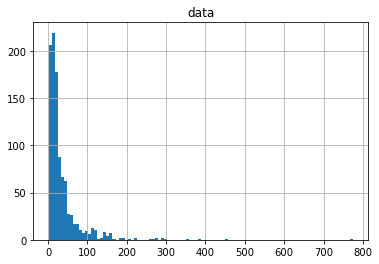

In [19]:
df.hist(bins=100)

In [20]:
shapiro(df)

ShapiroResult(statistic=0.5349293947219849, pvalue=2.802596928649634e-45)

In [22]:
stat, p_value = shapiro(df)
print(f'stat={stat}, p-value={p_value}')

stat=0.5349293947219849, p-value=2.802596928649634e-45


In [26]:
dflog = df.apply(np.log)

array([[<AxesSubplot:title={'center':'data'}>]], dtype=object)

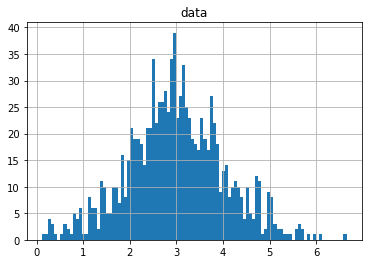

In [27]:
dflog.hist(bins=100)

In [46]:
a1,p1 = shapiro(dflog)

In [44]:
new_data, fitted_lambda = boxcox(df.data)

In [47]:
a2,p2 = shapiro(new_data)

In [49]:
p2/p1

1.5177068872950106

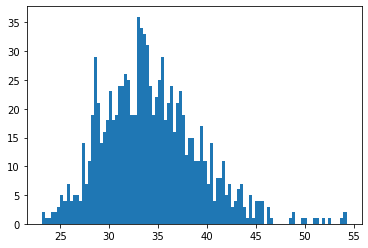

In [67]:
sample_mean = []
np.random.seed(1)

for i in range(1000):
    sample_n = np.random.choice(df.data, size=100)
    sample_mean.append(sample_n.mean())


pyplot.hist(sample_mean, bins=100)
pyplot.show()

In [51]:
shapiro(sample_mean)

ShapiroResult(statistic=0.9772937893867493, pvalue=2.177439652195634e-11)

In [68]:
sum(sample_mean) / len(sample_mean)


34.310253070378465

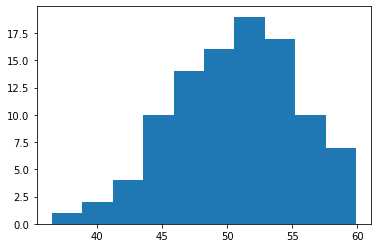

In [1]:
from numpy.random import randn
from matplotlib import pyplot
from scipy.stats import shapiro

data = 5 * randn(100) + 50

pyplot.hist(data)
pyplot.show()

In [2]:
stat, p_value = shapiro(data)
print(f'stat={stat}, p-value={p_value}')

alpha = 0.05
if p_value > alpha:
    print('Fail to reject H0, sample looks Gaussian')
else:
    print('Reject H0, sample is not Gaussian')

stat=0.9860756397247314, p-value=0.37851956486701965
Fail to reject H0, sample looks Gaussian


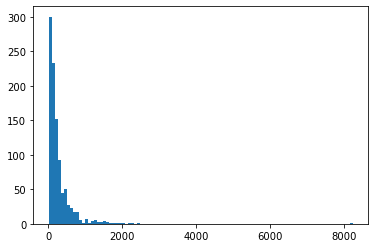

In [3]:
import numpy as np
from matplotlib import pyplot

data = np.random.lognormal(5, 1, 1000)

pyplot.hist(data, bins=100)
pyplot.show()

(array([ 1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,
         1.,  4.,  0.,  1.,  4.,  2.,  3.,  5.,  4.,  4., 10., 10.,  9.,
        14., 11.,  7., 16., 13., 18., 14., 13., 18., 23., 27., 20., 24.,
        22., 27., 25., 27., 22., 29., 24., 30., 23., 28., 30., 38., 29.,
        28., 22., 40., 20., 24., 13., 18., 16., 17., 24., 14., 16., 11.,
        13., 12., 10., 11., 12.,  4.,  1.,  7.,  1.,  4.,  6.,  3.,  6.,
         2.,  2.,  2.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.44056586, 1.5163397 , 1.59211355, 1.66788739, 1.74366123,
        1.81943507, 1.89520891, 1.97098276, 2.0467566 , 2.12253044,
        2.19830428, 2.27407813, 2.34985197, 2.42562581, 2.50139965,
        2.5771735 , 2.65294734, 2.72872118, 2.80449502, 2.88026887,
        2.95604271, 3.03181655, 3.10759039, 3.18336424, 3.25913808,
        3.33491192, 3.41068576, 3.4864596 , 3.56223345, 3.63800729,
        3.71378113, 3.7895

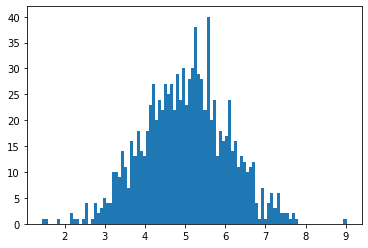

In [4]:
new_data = [np.log(x) for x in data]
pyplot.hist(new_data, bins=100)

In [5]:
stat, p_value = shapiro(new_data)
print(f'stat={stat}, p-value={p_value}')

stat=0.9989380240440369, p-value=0.839525043964386


In [8]:
from scipy.stats import boxcox
data = np.random.lognormal(5, 1, 1000)


new_data, fitted_lambda = boxcox(data)

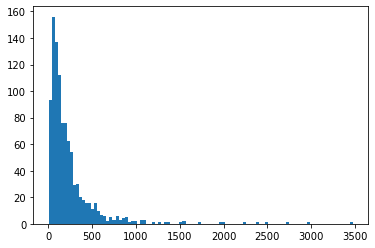

In [15]:
pyplot.hist(data, bins=100)
pyplot.show()

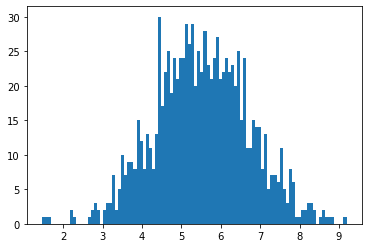

In [9]:
pyplot.hist(new_data, bins=100)
pyplot.show()

In [10]:
stat, p_value = shapiro(new_data)
print(f'stat={stat}, p-value={p_value}')

stat=0.9988229870796204, p-value=0.7697042226791382


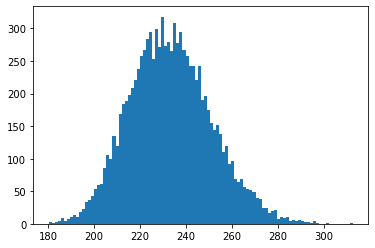

In [14]:
sample_mean = []

for i in range(10000):
    sample_n = np.random.choice(data, size=300)
    sample_mean.append(sample_n.mean())


pyplot.hist(sample_mean, bins=100)
pyplot.show()

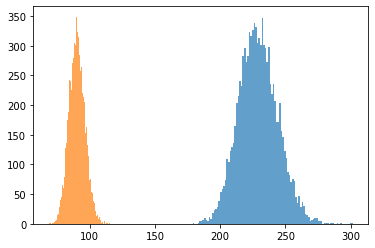

In [13]:
data2 = np.random.lognormal(4, 1, 1000)
data = np.random.lognormal(5, 1, 1000)
sample_mean2 = []

for i in range(10000):
    sample_n = np.random.choice(data2, size=300)
    sample_mean2.append(sample_n.mean())


pyplot.hist(sample_mean, bins=100, alpha=0.7)
pyplot.hist(sample_mean2, bins=100, alpha=0.7)
pyplot.show()

In [69]:
from scipy.stats import norm
import math

def confidence_interval_norm(alpha, sigma, n, mean):
    value = -norm.ppf(alpha / 2) * sigma / math.sqrt(n)
    return mean - value, mean + value

In [70]:
from scipy.stats import t
import math

def confidence_interval_t(alpha, s, n, mean):
    value = -t.ppf(alpha / 2, n - 1) * s / math.sqrt(n)
    return mean - value, mean + value

In [71]:
confidence_interval_norm(0.05,np.var(sample_mean)**(1/2),len(sample_mean),sum(sample_mean) / len(sample_mean))

(34.006278723852276, 34.614227416904654)

In [72]:
confidence_interval_t(0.05,np.var(sample_mean)**(1/2),len(sample_mean),sum(sample_mean) / len(sample_mean))

(34.00590999672282, 34.61459614403411)

In [80]:
import numpy as np, scipy.stats as st

st.t.interval(0.95, len(sample_mean)-1, loc=np.mean(sample_mean), scale=st.sem(sample_mean))

(34.005757710962186, 34.614748429794815)

In [ ]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [78]:
np.quantile(sample_mean,0.975)-np.quantile(sample_mean,0.025)

19.154393522620353

In [77]:
np.quantile(sample_mean,0.025)

25.914365155995

In [5]:
(700000*0.0254)

17780.0

In [7]:
(700000*0.0351)-(700000*0.0254)

6790.0

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

data = pd.read_csv("ecom_data.csv")

In [34]:
data = pd.read_csv("ecom_data_students.csv")

In [35]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GroupType
0,571664,22302,COFFEE MUG PEARS DESIGN,72,10/18/2011 12:59,2.100,17090.0,United Kingdom,control
1,573585,23086,ZINC STAR T-LIGHT HOLDER,1,10/31/2011 14:41,2.952,NaN,United Kingdom,test
2,556905,84596F,SMALL MARSHMALLOWS PINK BOWL,1,6/15/2011 13:05,0.420,16904.0,United Kingdom,control
3,561710,21066,VINTAGE RED MUG,1,7/29/2011 11:45,1.500,13827.0,United Kingdom,test
4,560078,22570,FELTCRAFT CUSHION RABBIT,4,7/14/2011 16:12,4.500,16040.0,United Kingdom,test
...,...,...,...,...,...,...,...,...,...
499995,555853,22469,HEART OF WICKER SMALL,1,6/7/2011 13:44,1.980,14375.0,United Kingdom,test
499996,573361,22420,LIPSTICK PEN BABY PINK,1,10/30/2011 12:53,0.504,14456.0,United Kingdom,test
499997,539437,21313,GLASS HEART T-LIGHT HOLDER,3,12/17/2010 14:54,1.992,NaN,United Kingdom,test
499998,580999,22897,OVEN MITT APPLES DESIGN,2,12/6/2011 17:49,1.740,17883.0,United Kingdom,test


In [13]:
data.CustomerID.nunique()

4372

In [33]:
data.UnitPrice.mean()

5.408474181105024

In [14]:
data.shape

(541909, 9)

In [41]:
data.groupby("InvoiceNo").UnitPrice.sum().mean()

114.52581574267387

<AxesSubplot:>

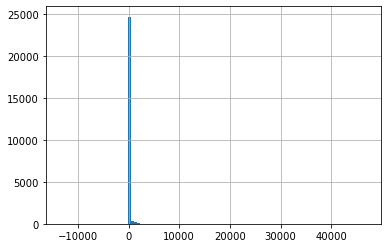

In [36]:
data.groupby("InvoiceNo").UnitPrice.sum().hist(bins=100)

In [37]:
data = data[data.UnitPrice > 0]

<AxesSubplot:>

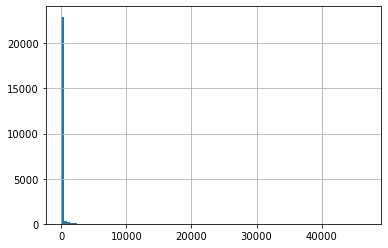

In [19]:
data.groupby("InvoiceNo").UnitPrice.sum().hist(bins=100)

ValueError: supplied range of [-inf, 10.75286895512671] is not finite

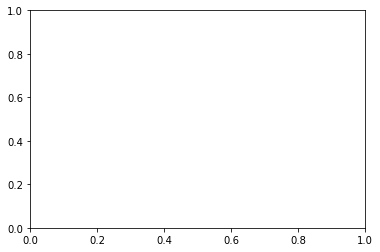

In [6]:
from matplotlib import pyplot

log_mean_bills = data.groupby("InvoiceNo").UnitPrice.sum().apply(lambda x: np.log(x)).values.tolist()

pyplot.hist(log_mean_bills, bins=100)
pyplot.show()

In [21]:
from scipy.stats import shapiro

In [23]:
from scipy.stats import boxcox

In [39]:
stat, p_value = shapiro(log_mean_bills)
print(f'stat={stat}, p-value={p_value}')

stat=0.9867745041847229, p-value=2.7567744688662126e-41


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


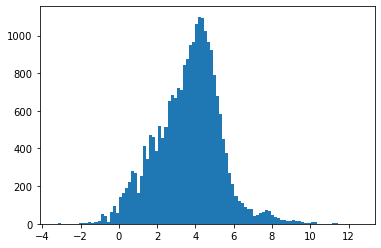

In [42]:
boxcox_mean_bills, fitted_lambda = boxcox(data.groupby("InvoiceNo").UnitPrice.sum().values.tolist())

pyplot.hist(boxcox_mean_bills, bins=100)
pyplot.show()

In [43]:
stat, p_value = shapiro(boxcox_mean_bills)
print(f'stat={stat}, p-value={p_value}')

stat=0.9874505996704102, p-value=1.886329901781566e-40


100%|██████████| 10000/10000 [00:09<00:00, 1054.14it/s]


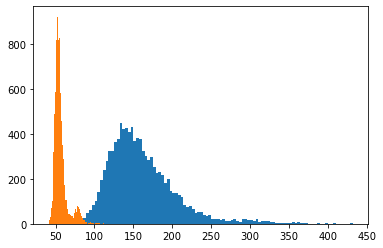

In [44]:
from tqdm import tqdm
np.random.seed(1)

all_values_test = data[data.GroupType == "test"].groupby("InvoiceNo").UnitPrice.sum().values.tolist()
all_values_control = data[data.GroupType == "control"].groupby("InvoiceNo").UnitPrice.sum().values.tolist()

sample_mean_test = []
sample_mean_control = []

for i in tqdm(range(10000)):
    sample_n = np.random.choice(all_values_test, size=300)
    sample_mean_test.append(sample_n.mean())

    sample_n = np.random.choice(all_values_control, size=300)
    sample_mean_control.append(sample_n.mean())


pyplot.hist(sample_mean_test, bins=100)
pyplot.hist(sample_mean_control, bins=100)
pyplot.show()

In [45]:
print(f"Control 95 percentile: {np.percentile(sample_mean_control, 95)}")
print(f"Test 5 percentile: {np.percentile(sample_mean_test, 5)}")

Control 95 percentile: 78.16725166666666
Test 5 percentile: 107.4521344


100%|██████████| 10000/10000 [00:09<00:00, 1064.23it/s]


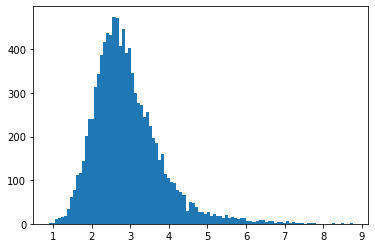

In [63]:
sample_mean_ratio = []
np.random.seed(1)
for i in tqdm(range(10000)):
    sample_test = np.random.choice(all_values_test, size=300)
    sample_control = np.random.choice(all_values_control, size=300)
    
    sample_mean_ratio.append(sample_test.mean() / sample_control.mean())


pyplot.hist(sample_mean_ratio, bins=100)
pyplot.show()

In [65]:
sum(sample_mean_ratio)/len(sample_mean_ratio)

2.9185941675039904

In [67]:
print(np.percentile(sample_mean_ratio, 97.5), np.percentile(sample_mean_ratio, 2.5))

5.184796070320843 1.6007426580117279


In [58]:
np.mean(sample_mean_ratio)

2.9185941675039837

In [3]:
df = pd.read_csv('PA_15_ab_test_results.csv')

In [4]:
df

,Day Index,Users,Email Subscriptions,Group Type
0,08/07/20,170,1,control
1,08/07/20,142,3,test
2,09/07/20,100,1,control
3,09/07/20,95,5,test
4,10/07/20,170,2,control
5,10/07/20,121,4,test
6,11/07/20,164,1,control
7,11/07/20,135,3,test
8,12/07/20,172,1,control
9,12/07/20,201,2,test


In [7]:
#df['Cn'] = df['Email Subscriptions']/df['Users']
dfi = df.groupby('Group Type')[['Users','Email Subscriptions']].sum()

In [15]:
dfj = dfi.reset_index()
dfj

,Group Type,Users,Email Subscriptions
0,control,2476,18
1,test,2663,49


In [16]:
dfj['c'] = dfj['Email Subscriptions']/dfj['Users']

In [41]:
dfj

,Group Type,Users,Email Subscriptions,c
0,control,2476,18,0.00727
1,test,2663,49,0.01840


In [42]:
dfj['c'][0]

0.007269789983844911

In [22]:
dfj['c'][1]/dfj['c'][0]

2.5310635457086827

In [40]:
ztest(dfj['c'][0],dfj['c'][1])

IndexError: tuple index out of range

In [ ]:
from statsmodels.stats.weightstats import ztest

In [29]:
df

,Day Index,Users,Email Subscriptions,Group Type
0,08/07/20,170,1,control
1,08/07/20,142,3,test
2,09/07/20,100,1,control
3,09/07/20,95,5,test
4,10/07/20,170,2,control
5,10/07/20,121,4,test
6,11/07/20,164,1,control
7,11/07/20,135,3,test
8,12/07/20,172,1,control
9,12/07/20,201,2,test


In [34]:
statistic, p_value = ztest(df[df['Group Type']=='test']['Email Subscriptions'],df[df['Group Type']=='control']['Email Subscriptions'])

In [35]:
statistic

4.485259450125895

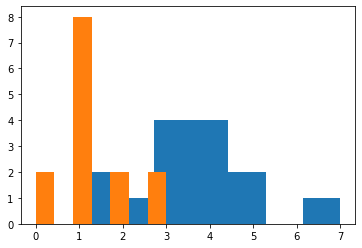

In [8]:
pyplot.hist(df[df['Group Type']=='test']['Email Subscriptions'], bins=7)
pyplot.hist(df[df['Group Type']=='control']['Email Subscriptions'], bins=7)
pyplot.show()

In [36]:
p_value

7.28252648334219e-06

In [39]:
df[df['Group Type']=='test']['Email Subscriptions']

1     3
3     5
5     4
7     3
9     2
11    4
13    4
14    1
17    1
18    3
20    7
22    5
24    3
27    4
Name: Email Subscriptions, dtype: int64

In [28]:
for player, group in df.groupby('Group Type'):
    group
    statistic, p_value = ztest(df[df['Group Type']='control']['Email Subscriptions'], df[df['Group Type']='test']['Email Subscriptions'])
    print(statistic,p_value)

   Day Index  Users  Email Subscriptions Group Type
0   08/07/20    170                    1    control
2   09/07/20    100                    1    control
4   10/07/20    170                    2    control
6   11/07/20    164                    1    control
8   12/07/20    172                    1    control
10  13/07/20    179                    0    control
12  14/07/20    346                    1    control
15  15/07/20    206                    1    control
16  16/07/20    169                    0    control
19  17/07/20    206                    1    control
21  18/07/20    149                    3    control
23  19/07/20     97                    3    control
25  20/07/20    170                    1    control
26  21/07/20    178                    2    control
   Day Index  Users  Email Subscriptions Group Type
1   08/07/20    142                    3       test
3   09/07/20     95                    5       test
5   10/07/20    121                    4       test
7   11/07/20

In [3]:
df = pd.read_csv('users_channel_groups_data.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 10
